### Import Statements

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

### 1. Dataset Overview:

#### Load the Fashion MNIST Dataset

In [ ]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#### Display some images

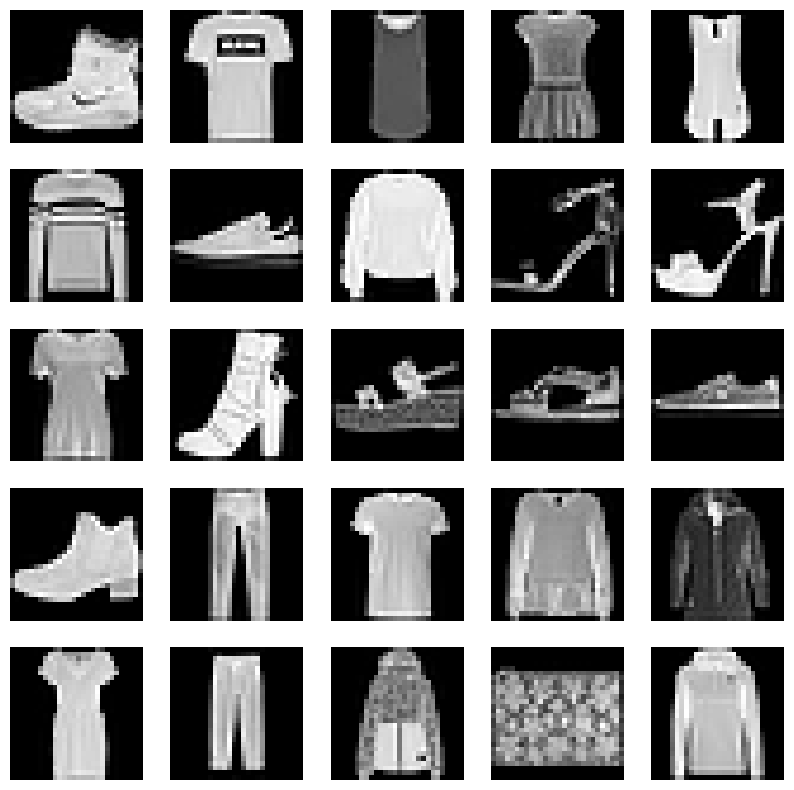

In [ ]:
# Plot some sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

### 2. Model Architecture:

### Kernel SIze = (3,3)

In [ ]:
model_1 = Sequential([
    # 3 CONV layers with Pooling Layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten Layer
    Flatten(),

    # Fully Connected Layer (Dense Layer)
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(10,  activation='softmax')
])

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Kernel Size = (5,5)

In [ ]:
model_2 = Sequential([
    # 3 CONV layers with Pooling Layers
    Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (2, 2), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (2, 2), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten Layer
    Flatten(),

    # Fully Connected Layer (Dense Layer)
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(10,  activation='softmax')
])

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Early Stopping: Realization Techniques

In [ ]:
# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

### 3. Model Training:

#### Model 1

In [ ]:
# Train the model 1
history_1 = model_1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.7482 - loss: 0.7396 - val_accuracy: 0.8495 - val_loss: 0.4063
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8648 - loss: 0.3794 - val_accuracy: 0.8695 - val_loss: 0.3561
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8790 - loss: 0.3299 - val_accuracy: 0.8726 - val_loss: 0.3463
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8914 - loss: 0.2961 - val_accuracy: 0.8841 - val_loss: 0.3146
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9014 - loss: 0.2718 - val_accuracy: 0.8788 - val_loss: 0.3411
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9095 - loss: 0.2523 - val_accuracy: 0.8846 - val_loss: 0.3220
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9135 - loss: 0.2364 - val_accuracy: 0.8909 - val_loss: 0.3318
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9227 - loss: 0.2138 - val_accuracy: 

#### Model 2

In [ ]:
# Train the model 2
history_2 = model_2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7403 - loss: 0.7656 - val_accuracy: 0.8369 - val_loss: 0.4133
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8609 - loss: 0.3831 - val_accuracy: 0.8596 - val_loss: 0.3691
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8766 - loss: 0.3389 - val_accuracy: 0.8756 - val_loss: 0.3449
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8880 - loss: 0.3076 - val_accuracy: 0.8878 - val_loss: 0.3071
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8958 - loss: 0.2815 - val_accuracy: 0.8860 - val_loss: 0.3175
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8995 - loss: 0.2715 - val_accuracy: 0.8758 - val_loss: 0.3508
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9066 - loss: 0.2563 - val_accuracy: 0.8946 - val_loss: 0.3092
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9098 - loss: 0.2433 - val_accuracy: 0

### 4. Evaluation:

#### Model 1

In [ ]:
# Evaluate the model on the test set
test_loss_1, test_acc_1 = model_1.evaluate(x_test, y_test)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8697 - loss: 0.3913
Test accuracy: 0.8694000244140625
Test loss: 0.37211182713508606


#### Model 2

In [ ]:
# Evaluate the model on the test set
test_loss_2, test_acc_2 = model_2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc_2)
print('Test loss:', test_loss_2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8830 - loss: 0.3763
Test accuracy: 0.8840000033378601
Test loss: 0.3608691990375519


#### Plotting Model 1

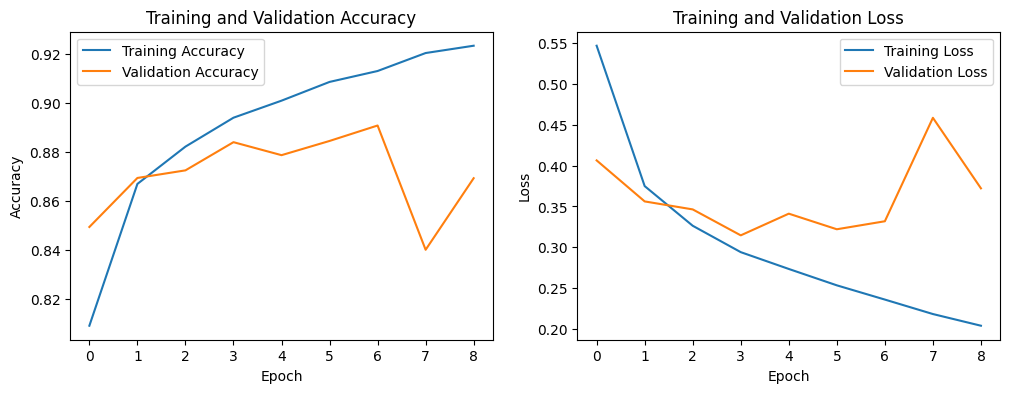

In [ ]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting Model 2

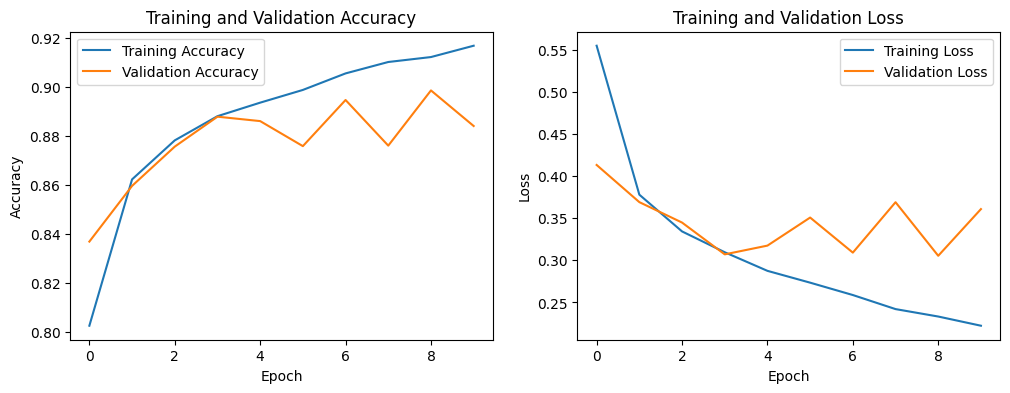

In [ ]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()